In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
IPA_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/IPA_results/'

In [4]:
## read in vivo regulons
ipa = pd.read_csv(IPA_dir + 'IPA_conserved_pathways_Fibroblasts.csv', sep = ',')
ipa

,IPA canonical pathways,invivo,exvivo
0,GADD45 Signaling,-0.229,-2.268
1,Cell Cycle: G2/M DNA Damage Checkpoint Regulation,-0.277,-0.655
2,Nicotine Degradation II,-0.333,-3.873
3,Apelin Cardiac Fibroblast Signaling Pathway,-0.378,-2.309
4,Antiproliferative Role of TOB in T Cell Signaling,-0.378,-0.905
5,Vitamin-C Transport,-0.447,-2.121
6,"Tryptophan Degradation X (Mammalian, via Trypt...",-0.447,-1.508
7,Dopamine Degradation,-0.447,-1.732
8,Ethanol Degradation IV,-0.447,-2.530
9,Dopamine Receptor Signaling,-0.447,-2.714


In [5]:
ipa.sort_values(by = 'invivo', ascending = False).head(25)

,IPA canonical pathways,invivo,exvivo
21,Intrinsic Prothrombin Activation Pathway,1.890,0.905
22,Epithelial Adherens Junction Signaling,1.852,0.122
23,MIF-mediated Glucocorticoid Regulation,1.633,0.333
24,PI3K/AKT Signaling,1.512,1.387
25,LPS/IL-1 Mediated Inhibition of RXR Function,1.387,0.667
26,TREM1 Signaling,1.265,0.816
27,Role of BRCA1 in DNA Damage Response,1.000,0.655
28,Aryl Hydrocarbon Receptor Signaling,0.928,0.822
29,Cyclins and Cell Cycle Regulation,0.832,2.785
30,Interferon Signaling,0.816,1.265


In [6]:
pathways = ['Intrinsic Prothrombin Activation Pathway','PI3K/AKT Signaling','TREM1 Signaling',
            'Interferon Signaling','WNT/β-catenin Signaling','Sonic Hedgehog Signaling',
            'Kinetochore Metaphase Signaling Pathway',
            'Apelin Cardiac Fibroblast Signaling Pathway','Cell Cycle: G2/M DNA Damage Checkpoint Regulation','GADD45 Signaling']

In [7]:
ipa = ipa[ipa['IPA canonical pathways'].isin(pathways)]

In [8]:
conserved_invivo = ipa[['IPA canonical pathways','invivo']]
conserved_invivo = conserved_invivo.sort_values(by = 'invivo', ascending = False)
conserved_invivo.rename(columns = {'invivo':'z-score'}, inplace = True)
conserved_invivo['condition'] = 'invivo'
conserved_exvivo = ipa[['IPA canonical pathways','exvivo']]
conserved_exvivo.rename(columns = {'exvivo':'z-score'}, inplace = True)
conserved_exvivo['condition'] = 'exvivo'

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
conserved_induced = pd.concat([conserved_invivo, conserved_exvivo], axis=0)

In [10]:
conserved_induced

,IPA canonical pathways,z-score,condition
21,Intrinsic Prothrombin Activation Pathway,1.890,invivo
24,PI3K/AKT Signaling,1.512,invivo
26,TREM1 Signaling,1.265,invivo
30,Interferon Signaling,0.816,invivo
34,Sonic Hedgehog Signaling,0.447,invivo
36,Kinetochore Metaphase Signaling Pathway,0.302,invivo
37,WNT/β-catenin Signaling,0.192,invivo
0,GADD45 Signaling,-0.229,invivo
1,Cell Cycle: G2/M DNA Damage Checkpoint Regulation,-0.277,invivo
3,Apelin Cardiac Fibroblast Signaling Pathway,-0.378,invivo


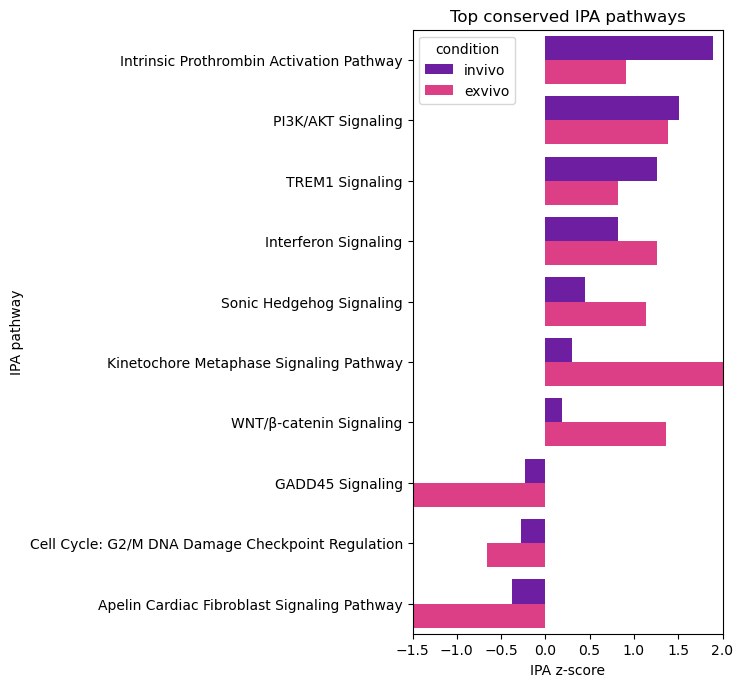

In [11]:
sb.barplot(data = conserved_induced,
           x = 'z-score',
           y = 'IPA canonical pathways',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved IPA pathways',
                xlabel = 'IPA z-score',
                ylabel = 'IPA pathway',
                xlim = (-1.5,2)
               )
plt.savefig(fig_dir + 'barplot_Fibroblasts_IPA_conserved_pathway.pdf')
plt.show()